<a href="https://www.kaggle.com/code/mounirelhady/dv-car-price-prediction?scriptVersionId=155305112" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dv-car-price-prediction/car_price_prediction.csv
/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv


# Import libraries 
**add libraries that we will use in our project**

In [2]:
# Adding the libraries
import numpy as np 
import openpyxl
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import os





import warnings
warnings.filterwarnings('ignore')

# Import dataset 
**Import the CSV file (dataset) that we will work on it**

In [3]:
# importing the dataset 
car_df = pd.read_csv('/kaggle/input/dv-car-price-prediction/car_price_prediction.csv')
car_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


# Data cleaning

In [4]:
car_df.shape

(19237, 18)

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

**Eliminating all extra variables**

DataFrame.drop() method is used to remove the columns from the DataFrame, by default it doesn’t remove on the existing DataFrame instead it returns a new DataFrame after dropping the columns specified with the drop method.

* Dropping the Id and doors columns which will not provide any information for our model 

In [6]:
car_df=car_df.drop(['ID','Doors'],axis=1)
car_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4


now determine the age of the car through this column prod year,Through this step, we use the import library datetime to determine the today's day, then we call function datetime.now from it, and we subtract the age of the car now from the age of the car at the time of manufacture through the prod year table. and drop this column prod year from dataset

* prod.year column is not useful ,so we will drop or replace it with Age column

In [7]:
import datetime
dtime=datetime.datetime.now()
car_df['Age']=dtime.year-car_df['Prod. year']

In [8]:
#car_df=car_df.drop(['Prod. year'],axis=1)
car_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,13
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,12
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,17
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,12
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,9


****Mileage****

In this column Mileage, it is converted to numeric data because it contains km, so km is deleted from the data by using replace km into ''

In [9]:
car_df["Mileage"]=car_df["Mileage"].str.replace('km','')
car_df["Mileage"]=car_df["Mileage"].astype('int64')
car_df.head(10)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,13
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,12
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,17
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,12
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,9
5,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931,4.0,Automatic,Front,Left wheel,White,4,7
6,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,Left wheel,White,12,13
7,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,Left wheel,Grey,12,10
8,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069,4.0,Automatic,Front,Left wheel,Black,12,9
9,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500,6.0,Automatic,4x4,Left wheel,Silver,12,16


****Cylinders column****

In [10]:
car_df['Cylinders']=car_df['Cylinders'].astype('int64')

****Engine volume****

* we need to strip the'Turbo' word in them,and convert it's type to float

In this column Engine volume, there is more than one data type. We want to convert from object to numeric data by using delete this word Turbo into '' Then, in order for the data to appear as float, we use astype



In [11]:
car_df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [12]:
car_df['Engine volume']=car_df['Engine volume'].str.replace('Turbo','')
car_df['Engine volume']=car_df['Engine volume'].astype(float)
car_df['Engine volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 19237, dtype: float64

In [13]:
car_df.head(10)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,Left wheel,Silver,12,13
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,Left wheel,Black,8,12
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,Right-hand drive,Black,2,17
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,Left wheel,White,0,12
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,Left wheel,Silver,4,9
5,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4,Automatic,Front,Left wheel,White,4,7
6,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4,Automatic,Front,Left wheel,White,12,13
7,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118,4,Automatic,Front,Left wheel,Grey,12,10
8,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069,4,Automatic,Front,Left wheel,Black,12,9
9,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500,6,Automatic,4x4,Left wheel,Silver,12,16


In [14]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  float64
 9   Mileage           19237 non-null  int64  
 10  Cylinders         19237 non-null  int64  
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
 16  Age               19237 non-null  int64 

**Detect and remove outliers**

In this step,we can detect outliers from the dataset because its cause nosie in data.
Steps to perform Outlier Detection by identifying the lowerbound and upperbound of the data:
1. Arrange your data in ascending order
2. Calculate Q1 ( the first Quarter)
3. Calculate Q3 ( the third Quartile)
4. Find IQR = (Q3 - Q1)
5. Find the lower Range = Q1 -(1.5 * IQR)
6. Find the upper Range = Q3 + (1.5 * IQR)

Once you get the upperbound and lowerbound, all you have to do is to delete any values which is less than lowerbound or greater than upperbound.

In [15]:
car_df_numeric=car_df.select_dtypes(exclude='object')
for col in car_df_numeric:
    q1=car_df[col].quantile(0.25)
    q3=car_df[col].quantile(0.75)
    # IQR
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr
    #detect outlier
    outlier=((car_df_numeric[col]>high)|(car_df_numeric[col]<low)).sum()
    total=car_df_numeric[col].shape[0]
    print(f"Total Outliers in {col} are :{outlier}-{round(100*(outlier)/total,2)}%")
    if outlier >0:
        car_df=car_df.loc[(car_df[col]<=high) & (car_df[col]>=low)]

Total Outliers in Price are :1073-5.58%
Total Outliers in Prod. year are :1515-7.88%
Total Outliers in Engine volume are :1381-7.18%
Total Outliers in Mileage are :784-4.08%
Total Outliers in Cylinders are :4870-25.32%
Total Outliers in Airbags are :0-0.0%
Total Outliers in Age are :1811-9.41%


# **Data Visualization** 

# bar plot

In [16]:
car_df.head(10)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,Right-hand drive,Black,2,17
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,Left wheel,White,0,12
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,Left wheel,Silver,4,9
5,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4,Automatic,Front,Left wheel,White,4,7
6,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4,Automatic,Front,Left wheel,White,12,13
7,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118,4,Automatic,Front,Left wheel,Grey,12,10
15,549,1079,TOYOTA,CHR,2018,Jeep,Yes,Petrol,2.0,74146,4,Automatic,Front,Left wheel,White,12,5
16,7683,810,HYUNDAI,Elantra,2016,Sedan,Yes,Petrol,1.8,121840,4,Automatic,Front,Left wheel,Blue,12,7
17,28382,810,HYUNDAI,Elantra,2016,Sedan,Yes,Petrol,1.8,54317,4,Automatic,Front,Left wheel,White,4,7
20,18826,531,HYUNDAI,Elantra,2012,Sedan,Yes,Petrol,1.6,112645,4,Automatic,Front,Left wheel,Silver,4,11


> Manufacturer columns

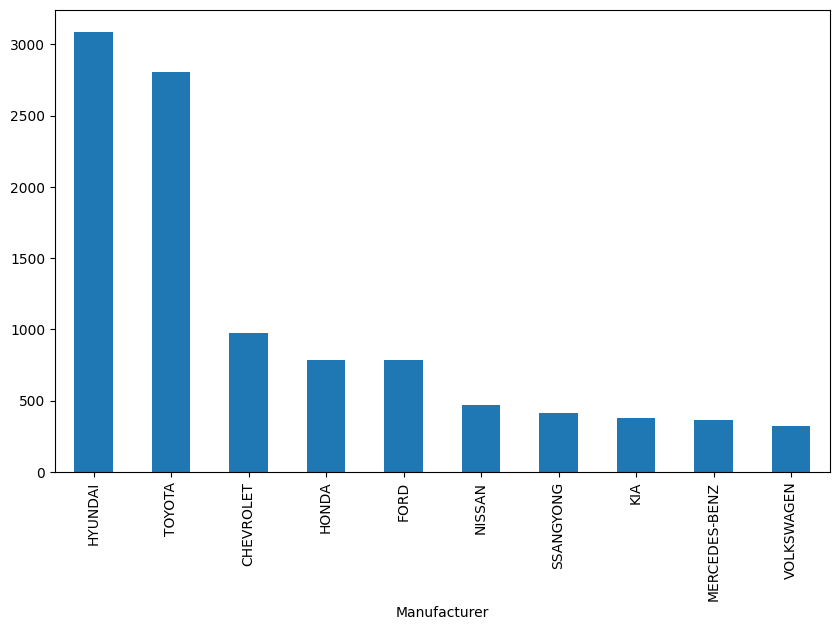

In [17]:
plt.figure(figsize=(10,6))
car_df['Manufacturer'].value_counts()[:10].plot(kind='bar')
plt.show()

* As shown above,there are Hyundai,Toyota,CHevrolet,ford which manufatured high number of cars

> Category Columns

In [18]:
car_df['Category'].unique()

array(['Hatchback', 'Jeep', 'Sedan', 'Universal', 'Minivan', 'Cabriolet',
       'Coupe', 'Microbus', 'Goods wagon', 'Pickup'], dtype=object)

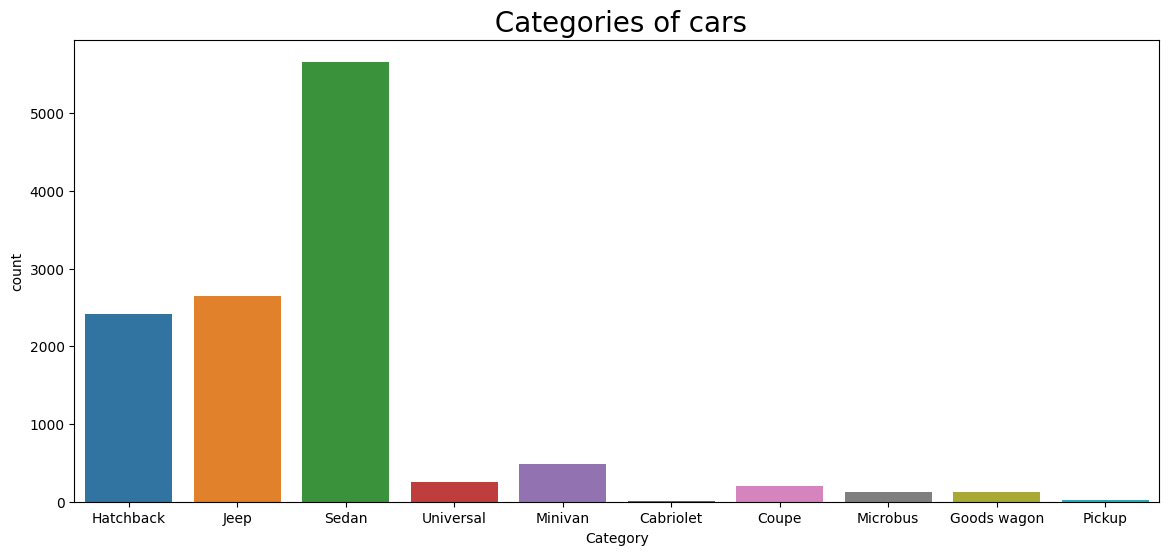

In [19]:
plt.subplots(figsize=(14,6))
sns.countplot(data=car_df, x='Category')
plt.title(" Categories of cars" , fontsize =20);
plt.show()

* There are 10 categories of cars in the dataset
* There are high number of categries in the cars dataset produced by different manufacturers. Above barplot shows how many categories are there in the dataset and which are most popular among people. High number of people prefers Sedan,Jeep,Hatchback categories of cars.Manufactured must produced this kind of categories of cars.

> fuel type columns

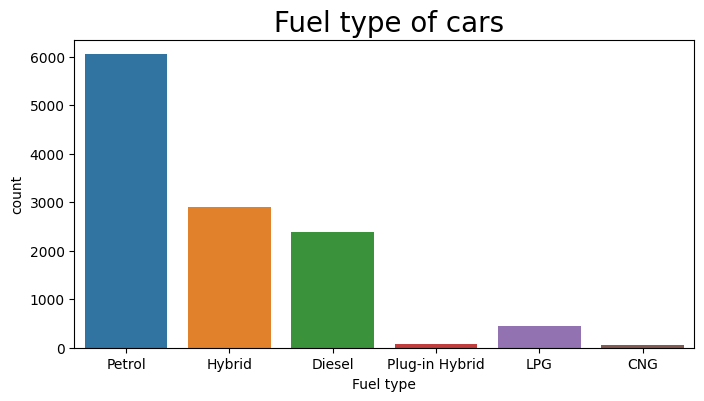

In [20]:
plt.subplots(figsize=(8,4))
sns.countplot(data=car_df , x='Fuel type')
plt.title(" Fuel type of cars" , fontsize =20);
plt.show()

* maximum number of cars are use petrol fuel type
* there is only 1 car of CNG fuel type 
* There are 6 Types of Fuel in the dataset
* Mostly cars produced having fuel of Petrol , Hybrid and Diesel. People less prefer other fuel type of cars than Petrol and Diesel

> Cylinders column

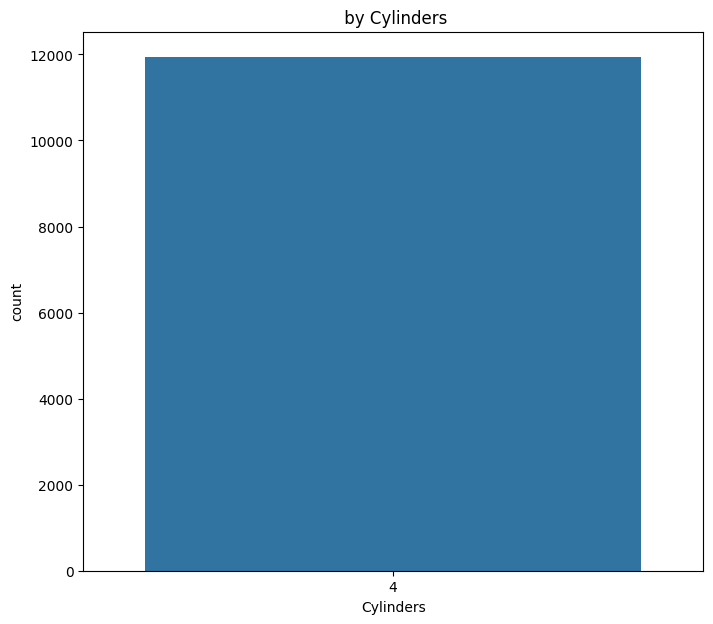

In [21]:
plt.subplots(figsize=(8,7))
sns.countplot(data=car_df , x='Cylinders')
plt.title(" by Cylinders")
plt.show()

** maximum number of cars have 4 Cylinders**

**color columns**

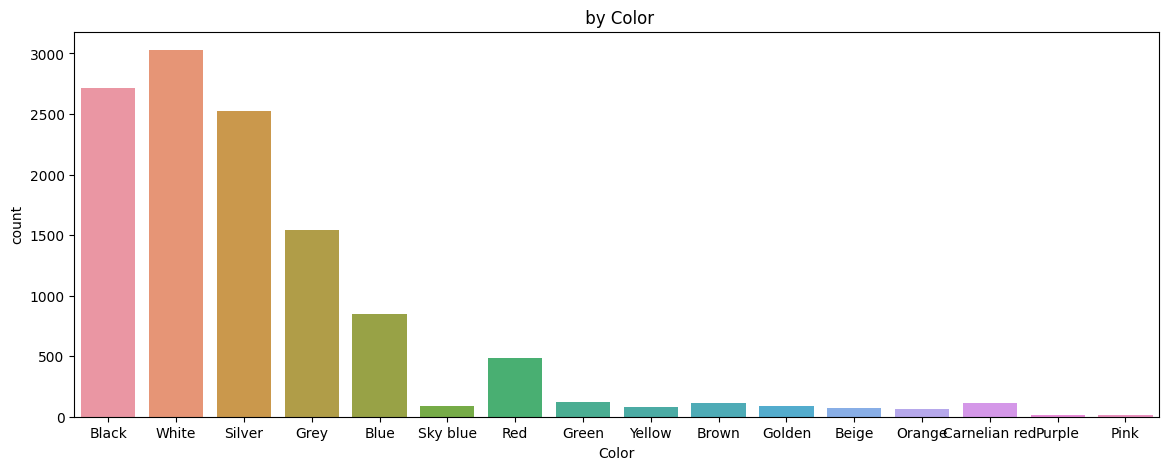

In [22]:
plt.subplots(figsize=(14,5))
sns.countplot(data=car_df , x='Color')
plt.title(" by Color");
plt.show()

* There are 16 Colors of Cars 
  in the dataset from the above graph ,we can say that White,black,Silver and Grey are most popualr colors of cars

# leather interior , wheel and drive wheels

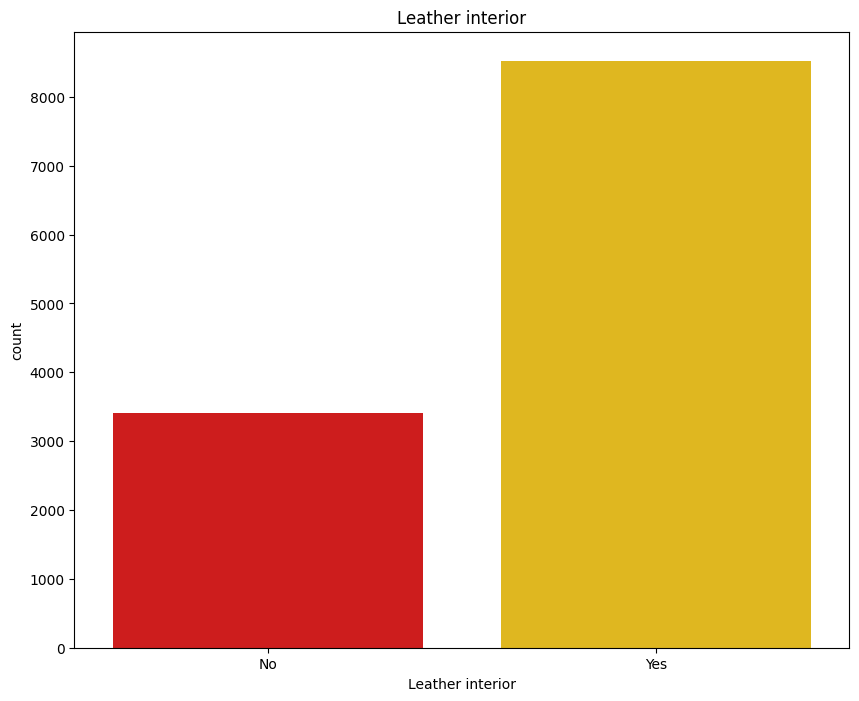

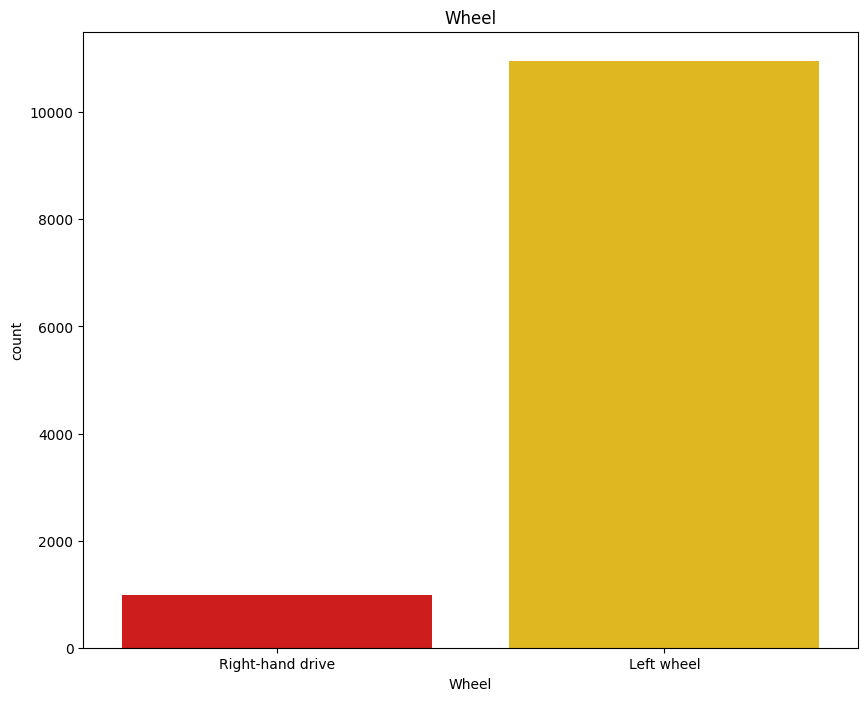

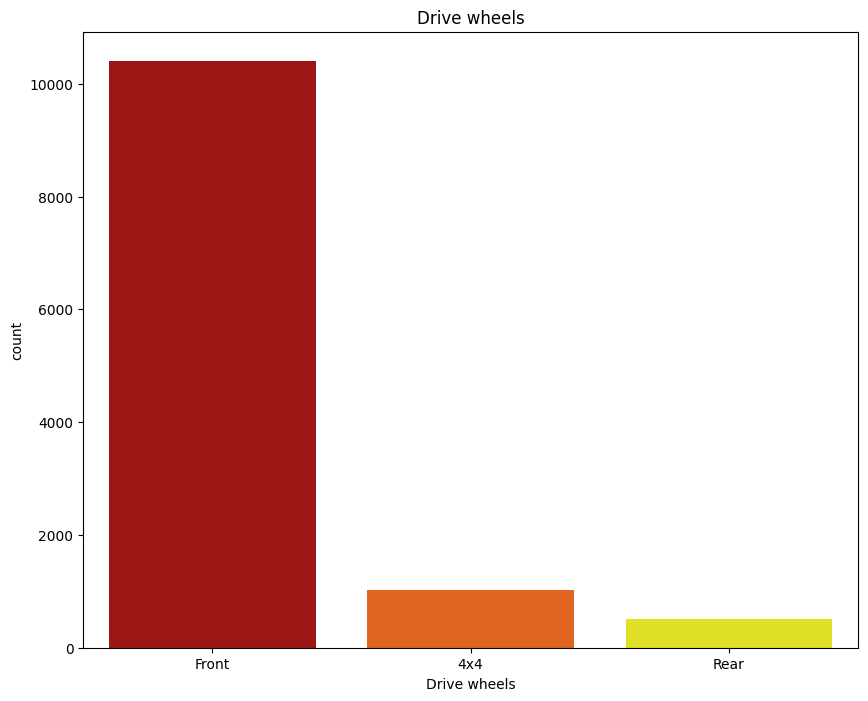

In [23]:
columns =['Leather interior','Wheel','Drive wheels']
for col in columns:
    plt.figure(figsize=(10,8))
    sns.countplot(data=car_df,x=col,palette='hot')
    plt.title(col)
    plt.show()

* in Leather interior,Most of the people prefers Cars having Leather Interior to not having that. Manufacturer should produce more Leather Interior designed Cars than not having Leather Interior Design Cars
* in wheel,There are 2 categories of Wheel in the dataset
  From the above graph, it is that most of the cars in the dataset have a left steering
* in Drive wheels,There are 3 Types of Drive wheels in the dataset
  From the above graph, we can see that most of the cars have Front drive wheels followed by 4*4 and     Rear

# Category vs Mileage

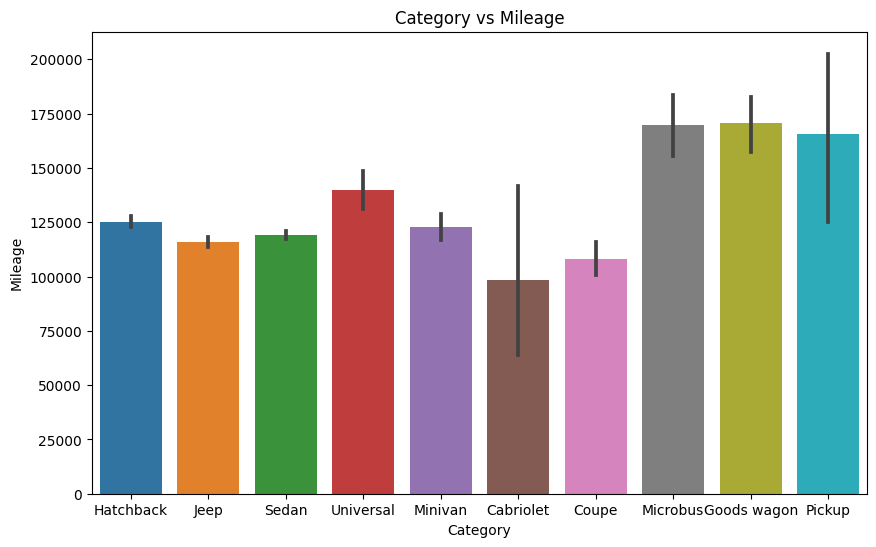

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(data=car_df,x='Category',y='Mileage')
plt.title("Category vs Mileage")
plt.show()

in this drawing the relationship between the column Category and Mileage,it is clear from drawing that the type of catagory microbus and wagon have more Mileage

#  factors affecting car price

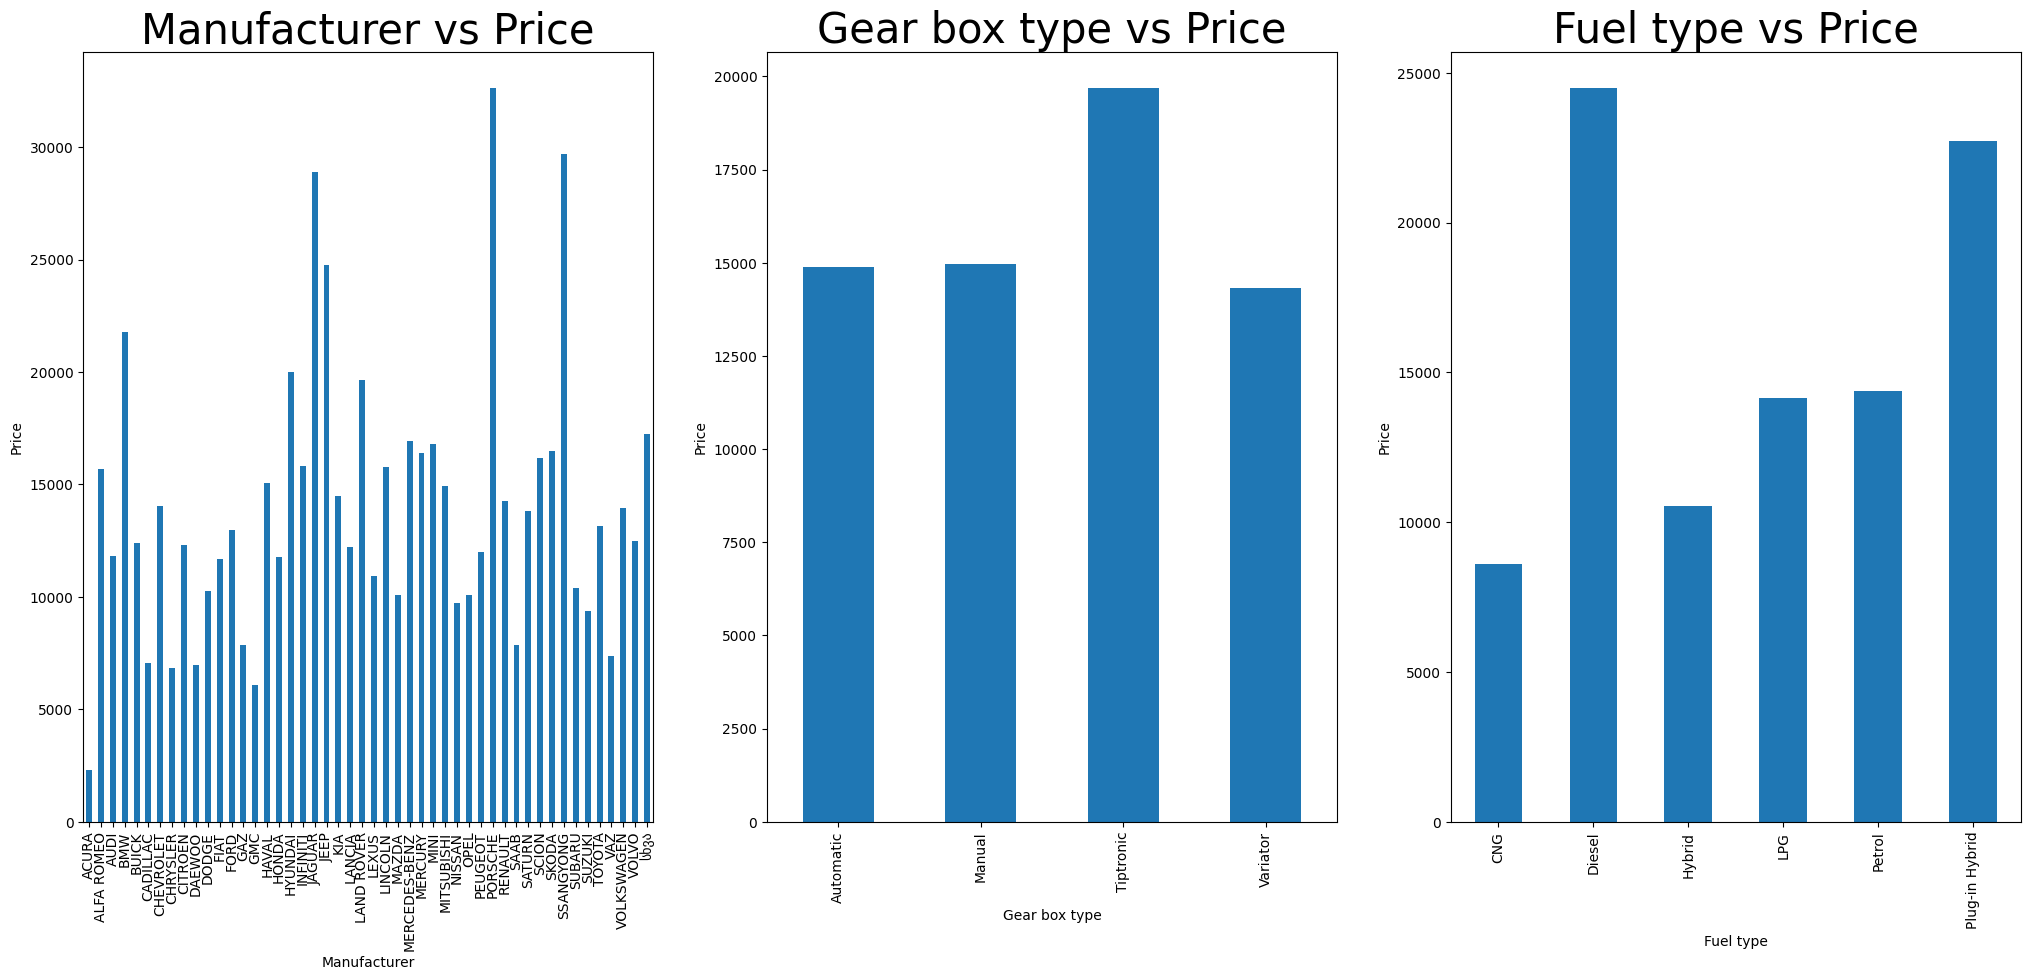

In [25]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('Manufacturer vs Price',fontsize = 30)
plt.ylabel("Price")
car_df.groupby('Manufacturer')['Price'].mean().plot.bar()
plt.subplot(132)
plt.title('Gear box type vs Price',fontsize = 30)
plt.ylabel("Price")
car_df.groupby('Gear box type')['Price'].mean().plot.bar()
plt.subplot(133)
plt.title('Fuel type vs Price',fontsize = 30)
plt.ylabel("Price")
car_df.groupby('Fuel type')['Price'].mean().plot.bar()
plt.show()

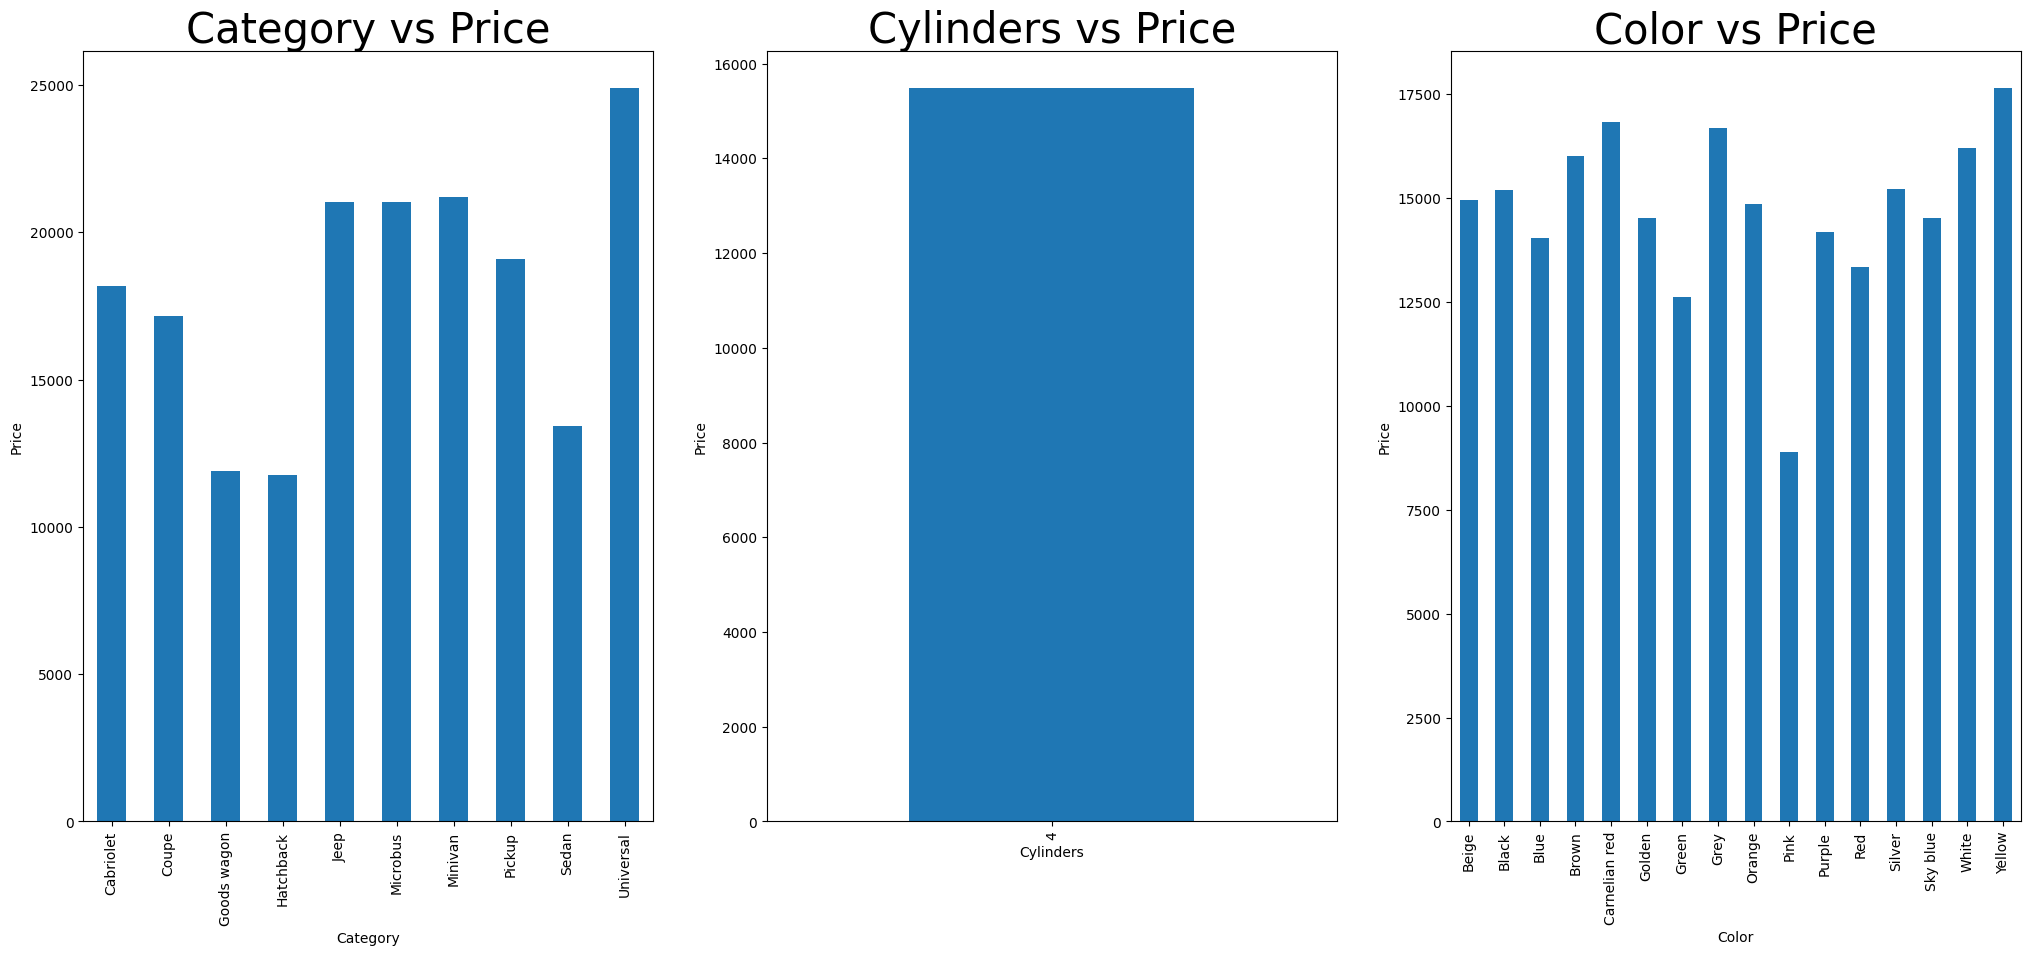

In [26]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('Category vs Price',fontsize = 30)
plt.ylabel("Price")
car_df.groupby('Category')['Price'].mean().plot.bar()
plt.subplot(132)
plt.title('Cylinders vs Price',fontsize = 30)
plt.ylabel("Price")
car_df.groupby('Cylinders')['Price'].mean().plot.bar()
plt.subplot(133)
plt.title('Color vs Price',fontsize = 30)
plt.ylabel("Price")
car_df.groupby('Color')['Price'].mean().plot.bar()
plt.show()

# top_10_cars

In [27]:
top_10_cars = car_df.Manufacturer.value_counts().sort_values(ascending=False)[:10]
top_10_cars

Manufacturer
HYUNDAI          3089
TOYOTA           2809
CHEVROLET         973
HONDA             785
FORD              782
NISSAN            469
SSANGYONG         415
KIA               378
MERCEDES-BENZ     363
VOLKSWAGEN        320
Name: count, dtype: int64

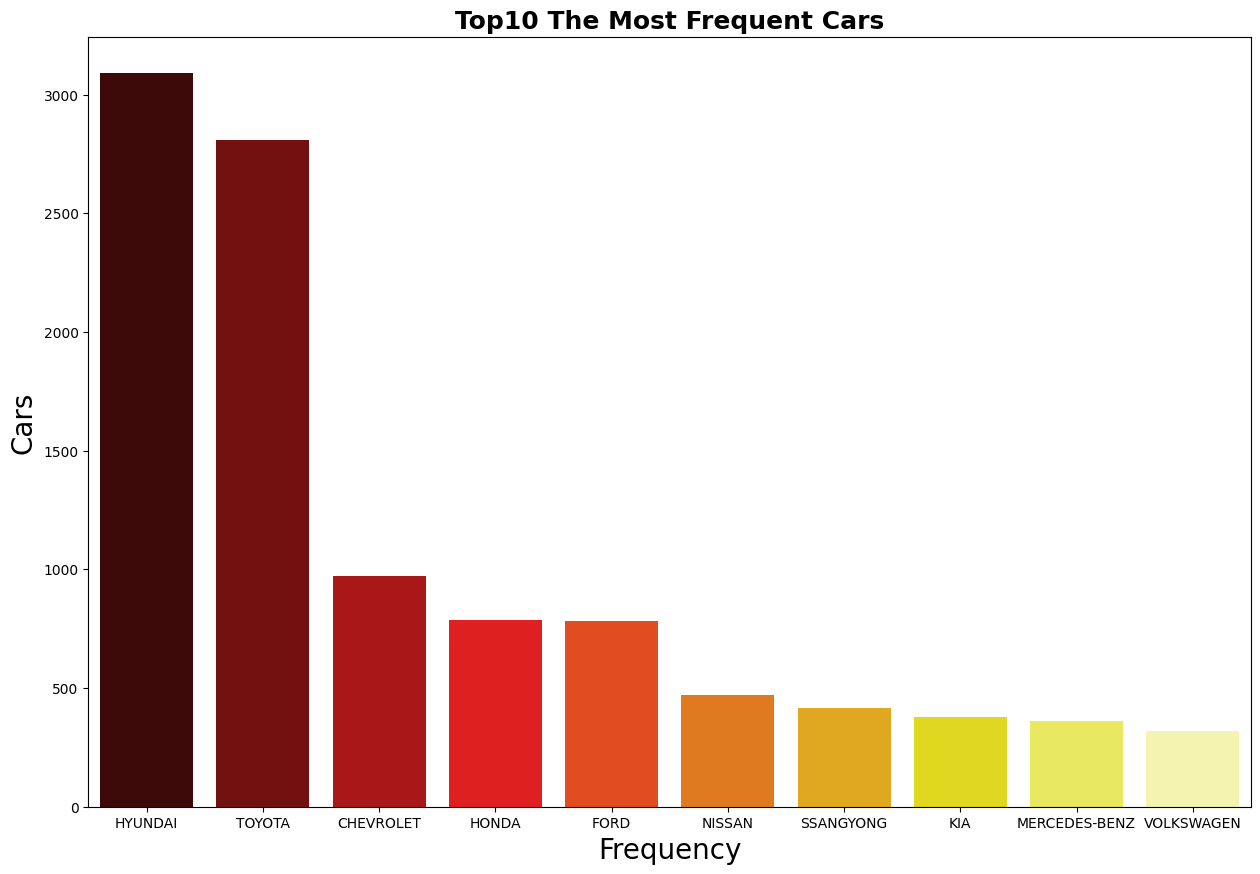

In [28]:
plt.figure(figsize=(15, 10))
sns.barplot(x= top_10_cars.index, y=top_10_cars,palette='hot',linewidth = 4)
plt.title('Top10 The Most Frequent Cars',loc='center',fontweight='bold',fontsize=18)
plt.xlabel('Frequency',fontsize=20)
plt.ylabel('Cars',fontsize=20)
plt.show()